In [77]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [78]:
# Initial data
data = {
    'punto': ['p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9'],
    'x1': [1, 3, 2, 6, 7, 8, 9, 10, 8],
    'x2': [2, 1, 3, 7 ,8, 6, 1 ,2 ,3],}

df = pd.DataFrame(data)
df.head(10)

,punto,x1,x2
0,p1,1,2
1,p2,3,1
2,p3,2,3
3,p4,6,7
4,p5,7,8
5,p6,8,6
6,p7,9,1
7,p8,10,2
8,p9,8,3


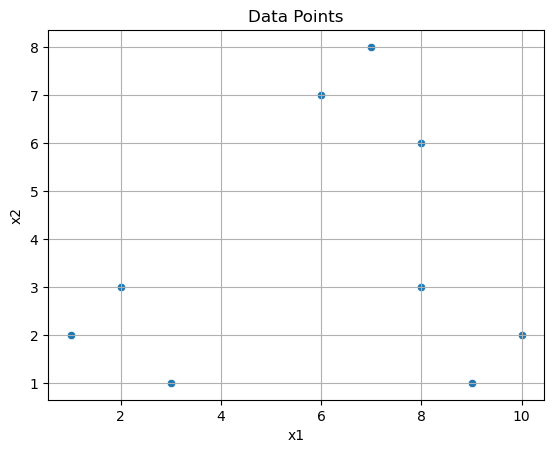

In [79]:
# Point graph
sns.scatterplot(data=df, x='x1', y='x2')
plt.title('Data Points')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()
plt.show()

In [80]:
# Select initial centroids from the data points
c1 = (2, 2)
c2 = (8, 2)
c3 = (7, 7)

# distance calculation
df['d1'] = df.apply(lambda row: math.sqrt((row['x1'] - c1[0])**2 + (row['x2'] - c1[1])**2), axis=1)
df['d2'] = df.apply(lambda row: math.sqrt((row['x1'] - c2[0])**2 + (row['x2'] - c2[1])**2), axis=1)
df['d3'] = df.apply(lambda row: math.sqrt((row['x1'] - c3[0])**2 + (row['x2'] - c3[1])**2), axis=1)

In [81]:
df

,punto,x1,x2,d1,d2,d3
0,p1,1,2,1.000000,7.000000,7.810250
1,p2,3,1,1.414214,5.099020,7.211103
2,p3,2,3,1.000000,6.082763,6.403124
3,p4,6,7,6.403124,5.385165,1.000000
4,p5,7,8,7.810250,6.082763,1.000000
5,p6,8,6,7.211103,4.000000,1.414214
6,p7,9,1,7.071068,1.414214,6.324555
7,p8,10,2,8.000000,2.000000,5.830952
8,p9,8,3,6.082763,1.000000,4.123106


In [82]:
# assign data points to nearest centroid
df['cluster'] = df.apply(lambda row: np.argmin([row['d1'], row['d2'], row['d3']]) + 1, axis=1)
df

,punto,x1,x2,d1,d2,d3,cluster
0,p1,1,2,1.000000,7.000000,7.810250,1
1,p2,3,1,1.414214,5.099020,7.211103,1
2,p3,2,3,1.000000,6.082763,6.403124,1
3,p4,6,7,6.403124,5.385165,1.000000,3
4,p5,7,8,7.810250,6.082763,1.000000,3
5,p6,8,6,7.211103,4.000000,1.414214,3
6,p7,9,1,7.071068,1.414214,6.324555,2
7,p8,10,2,8.000000,2.000000,5.830952,2
8,p9,8,3,6.082763,1.000000,4.123106,2


New Centroid 1: (np.float64(2.0), np.float64(2.0))
New Centroid 2: (np.float64(9.0), np.float64(2.0))
New Centroid 3: (np.float64(7.0), np.float64(7.0))


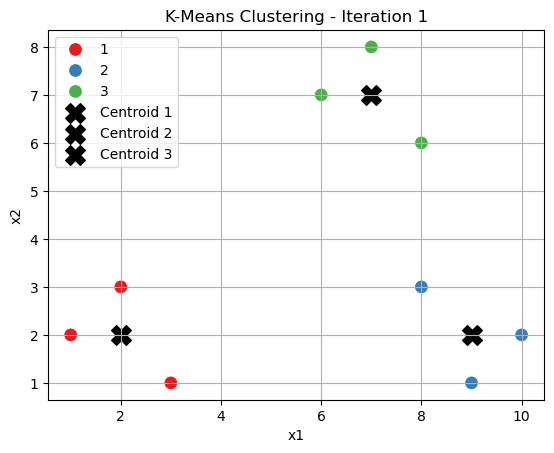

In [83]:
# New center as the mean of the points in each cluster
new_c1 = (df[df['cluster'] == 1]['x1'].mean(), df[df['cluster'] == 1]['x2'].mean())
new_c2 = (df[df['cluster'] == 2]['x1'].mean(), df[df['cluster'] == 2]['x2'].mean())
new_c3 = (df[df['cluster'] == 3]['x1'].mean(), df[df['cluster'] == 3]['x2'].mean())
print(f'New Centroid 1: {new_c1}')
print(f'New Centroid 2: {new_c2}')
print(f'New Centroid 3: {new_c3}')

# plot data points with clusters and new centroids
sns.scatterplot(data=df, x='x1', y='x2', hue='cluster', palette='Set1', s=100)
plt.scatter(new_c1[0], new_c1[1], color='black', marker='X', s=200, label='Centroid 1')
plt.scatter(new_c2[0], new_c2[1], color='black', marker='X', s=200, label='Centroid 2')
plt.scatter(new_c3[0], new_c3[1], color='black', marker='X', s=200, label='Centroid 3')
plt.title('K-Means Clustering - Iteration 1')
plt.xlabel('x1')    
plt.ylabel('x2')
plt.legend()
plt.grid()
plt.show()

Como los centroides cambiaron, se repite el calculo de distancia y la asignación de clusters

In [84]:
# recalculate distances to new centroids
df['d1'] = df.apply(lambda row: math.sqrt((row['x1'] - new_c1[0])**2 + (row['x2'] - new_c1[1])**2), axis=1)
df['d2'] = df.apply(lambda row: math.sqrt((row['x1'] - new_c2[0])**2 + (row['x2'] - new_c2[1])**2), axis=1)
df['d3'] = df.apply(lambda row: math.sqrt((row['x1'] - new_c3[0])**2 + (row['x2'] - new_c3[1])**2), axis=1)

# assign clusters based on new distances
df['cluster'] = df.apply(lambda row: np.argmin([row['d1'], row['d2'], row['d3']]) + 1, axis=1)
df


,punto,x1,x2,d1,d2,d3,cluster
0,p1,1,2,1.000000,8.000000,7.810250,1
1,p2,3,1,1.414214,6.082763,7.211103,1
2,p3,2,3,1.000000,7.071068,6.403124,1
3,p4,6,7,6.403124,5.830952,1.000000,3
4,p5,7,8,7.810250,6.324555,1.000000,3
5,p6,8,6,7.211103,4.123106,1.414214,3
6,p7,9,1,7.071068,1.000000,6.324555,2
7,p8,10,2,8.000000,1.000000,5.830952,2
8,p9,8,3,6.082763,1.414214,4.123106,2


In [85]:
# recalculate new centroids
new_c1 = (df[df['cluster'] == 1]['x1'].mean(), df[df['cluster'] == 1]['x2'].mean())
new_c2 = (df[df['cluster'] == 2]['x1'].mean(), df[df['cluster'] == 2]['x2'].mean())
new_c3 = (df[df['cluster'] == 3]['x1'].mean(), df[df['cluster'] == 3]['x2'].mean())
print(f'New Centroid 1: {new_c1}')
print(f'New Centroid 2: {new_c2}')
print(f'New Centroid 3: {new_c3}')

New Centroid 1: (np.float64(2.0), np.float64(2.0))
New Centroid 2: (np.float64(9.0), np.float64(2.0))
New Centroid 3: (np.float64(7.0), np.float64(7.0))


Termina porque se tiene los mismos centros

### Interpretación de los resultados

Con los centroides seleccionados inicialmente, se obtuvo convergencia en dos iteraciones
#### Cluster 1:
Centroide = (2, 2)

#### Cluster 2:
centroide: = (9 ,2)

#### Cluster 3:
centroide (7 ,7)

Como x1 y x2 representan coordenadas, estos centros serían los puntos más cercanos a los que se encuentran cada punto

### Extra - función iterativa con centroides aleatorios 

In [86]:
def manual_knn(data, k=3):
    random_centroids = np.random.choice(data.index, size=k, replace=False)
    centroids = data.loc[random_centroids, ['x1', 'x2']].values
    n_iterations = 0
    while True:
        distances = np.sqrt(((data[['x1', 'x2']].values - centroids[:, np.newaxis])**2).sum(axis=2))
        closest_centroids = np.argmin(distances, axis=0)
        new_centroids = np.array([data[closest_centroids == i][['x1', 'x2']].mean().values for i in range(k)])
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
        n_iterations += 1

    return pd.DataFrame({
        'x1': data['x1'],
        'x2': data['x2'],
        'd1': distances[0],
        'd2': distances[1],
        'd3': distances[2],
        'cluster': closest_centroids + 1
    }), n_iterations
    

In [87]:
df_results, n_iters = manual_knn(df, k=3)
print(f'K-Means converged in {n_iters} iterations.')
df_results

K-Means converged in 3 iterations.


,x1,x2,d1,d2,d3,cluster
0,1,2,7.810250,1.000000,8.000000,2
1,3,1,7.211103,1.414214,6.082763,2
2,2,3,6.403124,1.000000,7.071068,2
3,6,7,1.000000,6.403124,5.830952,1
4,7,8,1.000000,7.810250,6.324555,1
5,8,6,1.414214,7.211103,4.123106,1
6,9,1,6.324555,7.071068,1.000000,3
7,10,2,5.830952,8.000000,1.000000,3
8,8,3,4.123106,6.082763,1.414214,3
